# CIC Python workshop 

## Table of contents

1. [Loading and analysing a dataset](#dataset)
2. [Repeating actions with loops](#loops)
3. [Storing multiple values in lists](#lists)
4. [Making choices](#conditions)
5. [Creating functions](#functions)


<div id="dataset" />
# 1. Loading and analysing a dataset

## Learning objectives

* Explain what a library is, and what libraries are used for.
* Load a Python library and use the things it contains.
* Read tabular data from a file into a program.
* Assign values to variables.
* Select individual values and subsections from data.
* Perform operations on arrays of data.
* Display simple graphs.

Words are useful, but what’s more useful are the sentences and stories we build with them. Similarly, while a lot of powerful, general tools are built into languages like Python, specialized tools built up from these basic units live in libraries that can be called upon when needed.

In order to load our dataset (New York Air Quality measurements), we need to import a library called __`pandas`__. pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It is well suited for many different kinds of data:

* Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

We can load __`pandas`__ using:

In [1]:
import pandas

Importing a library is like getting a piece of lab equipment out of a storage locker and setting it up on the bench. Libraries provide additional functionality to the basic Python package, much like a new piece of equipment adds functionality to a lab space. Once you’ve loaded the library, we can ask the library to read our data file for us:

In [16]:
pandas.read_csv('data/NYairquality.csv')

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190,7.4,67,5,1
1,36,118,8.0,72,5,2
2,12,149,12.6,74,5,3
3,18,313,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28,NaN,14.9,66,5,6
6,23,299,8.6,65,5,7
7,19,99,13.8,59,5,8
8,8,19,20.1,61,5,9
9,NaN,194,8.6,69,5,10


The expression __`pandas.read_csv(...)`__ is a function call that asks Python to run the function __`read_csv`__ which belongs to the __`pandas`__ library. This dotted notation is used everywhere in Python to refer to the parts of things as __`thing`__.__`component`__.

__`pandas.read_csv`__ has one required parameter: the name of the file we want to read. This parameter needs to be a character string (or string for short), so we put them in quotes.

When we have finished typing and press Shift+Enter, the notebook runs our command. Since we haven’t told it to do anything else with the function’s output, the notebook displays it. In this case, the output is the data we just loaded. By default, not all rows and columns are shown (with ... to omit elements).

Our call to __`pandas.read_csv`__ reads our file, but doesn’t save the data in memory. To do that, we need to assign the output to a variable. 

## Variables

A variable is just a name for a value, such as __`x`__, __`current_temperature`__, or __`subject_id`__. Python’s variables must begin with a letter and are case sensitive. We can create a new variable by assigning a value to it using __`=`__. As an illustration, let’s step back and instead of considering a table of data, consider the simplest “collection” of data, a single value. The line below assigns the value __55__ to a variable __`weight_kg`__:

In [22]:
weight_kg = 55

Once a variable has a value, we can print it to the screen:

In [23]:
print(weight_kg)

55


and do arithmetic with it:

In [26]:
print('weight in pounds:', 2.2 * weight_kg)

('weight in pounds:', 126.50000000000001)


As the example above shows, we can print several things at once by separating them with commas.
We can also change a variable’s value by assigning it a new one:

In [25]:
weight_kg = 57.5
print('weight in kilograms is now:', weight_kg)

('weight in kilograms is now:', 57.5)


If we imagine the variable as a sticky note with a name written on it, assignment is like putting the sticky note on a particular value:

![Variables as Sticky Notes](figures/python-sticky-note-variables-01.svg)
<center>__Figure: Variables as Sticky Notes__</center>

This means that assigning a value to one variable does not change the values of other variables. For example, let’s store the subject’s weight in pounds in a variable:

In [7]:
weight_lb = 2.2 * weight_kg
print('weight in kilograms:', weight_kg, 'and in pounds:', weight_lb)

('weight in kilograms:', 57.5, 'and in pounds:', 126.50000000000001)


![Variables as Sticky Notes](figures/python-sticky-note-variables-02.svg)
<center>__Figure: Creating Another Variable__</center>

and then change weight_kg:

In [8]:
weight_kg = 100.0
print('weight in kilograms is now:', weight_kg, 'and weight in pounds is still:', weight_lb)

('weight in kilograms is now:', 100.0, 'and weight in pounds is still:', 126.50000000000001)


![Variables as Sticky Notes](figures/python-sticky-note-variables-03.svg)
<center>__Figure: Updating a Variable__</center>

Since __`weight_lb`__ doesn’t “remember” where its value came from, it isn’t automatically updated when __`weight_kg`__ changes. This is different from the way spreadsheets work.

Just as we can assign a single value to a variable, we can also assign a table of values to a variable using the same syntax. Let’s re-run __`pandas.read_csv`__ and save its result:

In [27]:
data = pandas.read_csv('data/NYairquality.csv')

This statement doesn’t produce any output because assignment doesn’t display anything. If we want to check that our data has been loaded, we can print the variable’s value:

In [28]:
print(data)

     Ozone  Solar.R  Wind  Temp  Month  Day
0       41      190   7.4    67      5    1
1       36      118   8.0    72      5    2
2       12      149  12.6    74      5    3
3       18      313  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
5       28      NaN  14.9    66      5    6
6       23      299   8.6    65      5    7
7       19       99  13.8    59      5    8
8        8       19  20.1    61      5    9
9      NaN      194   8.6    69      5   10
10       7      NaN   6.9    74      5   11
11      16      256   9.7    69      5   12
12      11      290   9.2    66      5   13
13      14      274  10.9    68      5   14
14      18       65  13.2    58      5   15
15      14      334  11.5    64      5   16
16      34      307  12.0    66      5   17
17       6       78  18.4    57      5   18
18      30      322  11.5    68      5   19
19      11       44   9.7    62      5   20
20       1        8   9.7    59      5   21
21      11      320  16.6    73 

Now that our data is in memory, we can start doing things with it. First, let’s ask what type of thing data refers to:

In [29]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


The output tells us that `data` currently refers to a thing called __`DataFrame`__ created by the __`pandas`__ library (actually a sub-library). The fancy name DataFrame is adopted from the R programming language, you can think of it as a table (with rows and columns).

This looks complex but there are simpler examples.

In [30]:
print(type(weight_kg))

<type 'float'>


Which means __`weight_kg`__ is a floating point number.

Our data corresponds to daily records of patients’ arthritis inflammation. Each record contains a inflammation measurement for each patient and day. We can see the size of the table like this:

In [31]:
data.shape

(153, 6)

This tells us that __`data`__ has 153 rows and 6 columns. When we created the variable __`data`__ to store our arthritis data, we didn’t just create the table, we also created information about the table, called members or attributes. This extra information describes data in the same way an adjective describes a noun. __`data.shape`__ is an attribute of __`data`__ which describes the dimensions of `data`. We use the same dotted notation for the attributes of variables that we use for the functions in libraries because they have the same part-and-whole relationship.

We can get summary statistics of our dataset by doing:

In [32]:
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


__`describe`__ here is a _method_ of the __`DataFrame`__, i.e., a function that belongs to the table in the same way that the member __`shape`__ does. If variables are nouns, methods are verbs: they are what the thing in question knows how to do. We need empty parentheses for __`data.describe()`__, even when we’re not passing in any parameters, to tell Python to go and do something for us. __`data.shape`__ doesn’t need __`()`__ because it is just a description but __`data.describe()`__ requires the __`()`__ because it is an action.

We can get the column names of our dataset by doing:

In [38]:
data.columns

Index([u'Ozone', u'Solar.R', u'Wind', u'Temp', u'Month', u'Day'], dtype='object')

We can also get the unique values of the Month column:

In [41]:
data['Month'].unique()

array([5, 6, 7, 8, 9])

If we want to get a single entry from the table, we provide an index in square brackets with __`loc`__ (label-location based index). Here we get the first row of the dataset (index = 0):

In [50]:
print(data.loc[0])

Ozone       41.0
Solar.R    190.0
Wind         7.4
Temp        67.0
Month        5.0
Day          1.0
Name: 0, dtype: float64


To acccess a specific row and column of the dataframe we run __`data.loc[row, column]`__:

In [53]:
print(data.loc[0, 'Temp'])

67.0


We can also select multiple rows and columns from the Dataframe using __`data.loc[start_row:end_row, [column_names]]`__:

In [58]:
print(data.loc[0:5, ['Temp', 'Month', 'Day']])

   Temp  Month  Day
0    67      5    1
1    72      5    2
2    74      5    3
3    62      5    4
4    56      5    5
5    66      5    6


Dataframe columns can also be selected based on their numbered index using __`iloc`__ (integer-location based index) with  __`data.iloc[start_row:end_row, start_column:end_column]:`__

In [64]:
print(data.iloc[0:6, 3:6])

   Temp  Month  Day
0    67      5    1
1    72      5    2
2    74      5    3
3    62      5    4
4    56      5    5
5    66      5    6


Find days when the Ozone was particularly high. i.e. over 70 parts per billion (ppb)

In [94]:
high_ozone = data['Ozone'] > 70
print high_ozone

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
123     True
124     True
125     True
126     True
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
Name: Ozone, dtype: bool


__`high_ozone`__ is a boolean array (more accurately a pandas __`Series`__) that has the value of __`True`__ for rows that have a Ozone measurement over 70 ppb. This boolean array can be used to only select rows that meet this filter / requirement

In [92]:
data[high_ozone]

,Ozone,Solar.R,Wind,Temp,Month,Day
29,115,223,5.7,79,5,30
39,71,291,13.8,90,6,9
61,135,269,4.1,84,7,1
67,77,276,5.1,88,7,7
68,97,267,6.3,92,7,8
69,97,272,5.7,92,7,9
70,85,175,7.4,89,7,10
79,79,187,5.1,87,7,19
84,80,294,8.6,86,7,24
85,108,223,8.0,85,7,25


Let's determine which months has more high ozone days by plotting a histogram

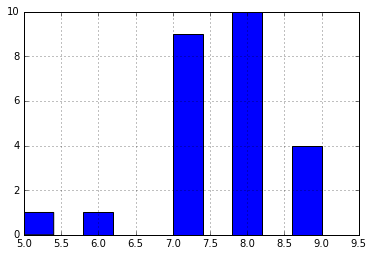

In [95]:
data[high_ozone].Month.hist()

Here we see that months 7 (July) and 8 (August) have the most high ozone days

some questions / exercises

**TODO** Kevin: Andrea, do you think the following sections really suit the workshop? Otherwise, we could incorporate some of the ideas, e.g. loops, conditional statements and creating functions in the above exercises / walk throughs?

<div id="loops" />
# 2. Repeating Actions with Loops

### Learning objectives

* Explain what a for loop does.
* Correctly write for loops to repeat simple calculations.
* Trace changes to a loop variable as the loop runs.
* Trace changes to other variables as they are updated by a for loop.

In the last lesson, we wrote some code that plots some values of interest from our first inflammation dataset, and reveals some suspicious features in it, such as from __`inflammation-01.csv`__

![Inflammation Dataset Plots](figures/03-loop_2_0.png)
<center>__Figure: Inflammation Dataset Plots__</center>

We have a dozen data sets right now, though, and more on the way. We want to create plots for all of our data sets with a single statement. To do that, we’ll have to teach the computer how to repeat things.

An example task that we might want to repeat is printing each character in a word on a line of its own. One way to do this would be to use a series of __`print`__ statements:

In [ ]:
word = 'lead'
print(word[0])
print(word[1])
print(word[2])
print(word[3])

This is a bad approach for two reasons:

1. It doesn’t scale: if we want to print the characters in a string that’s hundreds of letters long, we’d be better off just typing them in.

2. It’s fragile: if we give it a longer string, it only prints part of the data, and if we give it a shorter one, it produces an error because we’re asking for characters that don’t exist.

In [ ]:
word = 'tin'
print(word[0])
print(word[1])
print(word[2])
print(word[3])

Here’s a better approach:

In [ ]:
word = 'lead'
for char in word:
    print(char)

This is shorter—certainly shorter than something that prints every character in a hundred-letter string—and more robust as well:

In [ ]:
word = 'oxygen'
for char in word:
    print(char)

The improved version uses a for loop to repeat an operation—in this case, printing—once for each thing in a collection. The general form of a loop is:

```for variable in collection:
    do things with variable```

Using the oxygen example above, the loop might look like this:

![Loop Example](figures/loops_image.png)
<center>__Figure: Loop Example__</center>

Where each character (__`char`__) in the variable __`word`__ is looped through and printed one character after another. The numbers in the diagram denote which loop cycle the character was printed in (1 being the first loop, and 6 being the final loop).

We can call the loop variable anything we like, but there must be a colon at the end of the line starting the loop, and we must indent anything we want to run inside the loop. Unlike many other languages, there is no command to signify the end of the loop body (e.g. end for); what is indented after the for statement belongs to the loop.

Here’s another loop that repeatedly updates a variable:

In [ ]:
length = 0
for vowel in 'aeiou':
    length = length + 1
print('There are', length, 'vowels')

It’s worth tracing the execution of this little program step by step. Since there are five characters in __`'aeiou'`__, the statement on line 3 will be executed five times. The first time around, __`length`__ is zero (the value assigned to it on line 1) and __`vowel`__ is '__`a`__'. The statement adds 1 to the old value of __`length`__, producing 1, and updates __`length`__ to refer to that new value. The next time around, __`vowel`__ is '__`e`__' and __`length`__ is 1, so __`length`__ is updated to be 2. After three more updates, __`length`__ is 5; since there is nothing left in '__`aeiou`__' for Python to process, the loop finishes and the __`print`__ statement on line 4 tells us our final answer.

Note that a loop variable is just a variable that’s being used to record progress in a loop. It still exists after the loop is over, and we can re-use variables previously defined as loop variables as well:

In [ ]:
letter = 'z'
for letter in 'abc':
    print(letter)
print('after the loop, letter is', letter)

Note also that finding the length of a string is such a common operation that Python actually has a built-in function to do it called __`len`__:

In [ ]:
print(len('aeiou'))

__`len`__ is much faster than any function we could write ourselves, and much easier to read than a two-line loop; it will also give us the length of many other things that we haven’t met yet, so we should always use it when we can.

### From 1 to N

Python has a built-in function called __`range`__ that creates a sequence of numbers. Range can accept 1-3 parameters. If one parameter is input, range creates an array of that length, starting at zero and incrementing by 1. If 2 parameters are input, range starts at the first and ends just before the second, incrementing by one. If range is passed 3 parameters, it starts at the first one, ends just before the second one, and increments by the third one. For example, __`range(3)`__ produces the numbers 0, 1, 2, while __`range(2, 5)`__ produces 2, 3, 4, and __`range(3, 10, 3)`__ produces 3, 6, 9. Using __`range`__, write a loop that uses __`range`__ to print the first 3 natural numbers:

In [ ]:
1
2
3

### Computing powers with loops

Exponentiation is built into Python:

In [ ]:
print(5 ** 3)

Write a loop that calculates the same result as __`5 ** 3`__ using multiplication (and without exponentiation).

### Reverse a string

Write a loop that takes a string, and produces a new string with the characters in reverse order, so __`'Newton'`__ becomes __`'notweN'`__.

<div id="lists" />
# 3. Storing Multiple Values in Lists

### Learning objectives

* Explain what a list is.
* Create and index lists of simple values.

Just as a for loop is a way to do operations many times, a list is a way to store many values. Unlike __`NumPy`__ arrays, lists are built into the language (so we don’t have to load a library to use them). We create a list by putting values inside square brackets:

In [ ]:
odds = [1, 3, 5, 7]
print('odds are:', odds)

We select individual elements from lists by indexing them:

In [ ]:
print('first and last:', odds[0], odds[-1])

and if we loop over a list, the loop variable is assigned elements one at a time:

In [ ]:
for number in odds:
    print(number)

There is one important difference between lists and strings: we can change the values in a list, but we cannot change the characters in a string. For example:

In [ ]:
names = ['Newton', 'Darwing', 'Turing'] # typo in Darwin's name
print('names is originally:', names)
names[1] = 'Darwin' # correct the name
print('final value of names:', names)

works, but:

In [ ]:
name = 'Bell'
name[0] = 'b'

does not.

### Ch-Ch-Ch-Changes

Data which can be modified in place is called __`mutable`__, while data which cannot be modified is called __`immutable`__. Strings and numbers are immutable. This does not mean that variables with string or number values are constants, but when we want to change the value of a string or number variable, we can only replace the old value with a completely new value.

Lists and arrays, on the other hand, are mutable: we can modify them after they have been created. We can change individual elements, append new elements, or reorder the whole list. For some operations, like sorting, we can choose whether to use a function that modifies the data in place or a function that returns a modified copy and leaves the original unchanged.

Be careful when modifying data in place. If two variables refer to the same list, and you modify the list value, it will change for both variables! If you want variables with mutable values to be independent, you must make a copy of the value when you assign it.

Because of pitfalls like this, code which modifies data in place can be more difficult to understand. However, it is often far more efficient to modify a large data structure in place than to create a modified copy for every small change. You should consider both of these aspects when writing your code.

### Nested Lists

Since lists can contain any Python variable, it can even contain other lists.

For example, we could represent the products in the shelves of a small grocery shop:

In [ ]:
x = [['pepper', 'zucchini', 'onion'],
     ['cabbage', 'lettuce', 'garlic'],
     ['apple', 'pear', 'banana']]

Here is a visual example of how indexing a list of lists __`x`__ works:

![List indexing Example](figures/indexing_lists_python.png)
<center>__Figure: List indexing Example__</center>

Using the previously declared list __`x`__, these would be the results of the index operations shown in the image:

In [ ]:
print([x[0]])

In [ ]:
print(x[0])

In [ ]:
print(x[0][0])

Thanks to [Hadley Wickham](https://twitter.com/hadleywickham/status/643381054758363136) for the image above.

There are many ways to change the contents of lists besides assigning new values to individual elements:

In [ ]:
odds.append(11)
print('odds after adding a value:', odds)

In [ ]:
del odds[0]
print('odds after removing the first element:', odds)

In [ ]:
odds.reverse()
print('odds after reversing:', odds)

While modifying in place, it is useful to remember that Python treats lists in a slightly counterintuitive way.

If we make a list and (attempt to) copy it then modify in place, we can cause all sorts of trouble:

In [ ]:
odds = [1, 3, 5, 7]
primes = odds
primes += [2]
print('primes:', primes)
print('odds:', odds)

This is because Python stores a list in memory, and then can use multiple names to refer to the same list. If all we want to do is copy a (simple) list, we can use the __`list`__ function, so we do not modify a list we did not mean to:

In [ ]:
odds = [1, 3, 5, 7]
primes = list(odds)
primes += [2]
print('primes:', primes)
print('odds:', odds)

This is different from how variables worked in the previous lesson, and more similar to how a spreadsheet works.

### Turn a string into a list

Use a for-loop to convert the string “hello” into a list of letters:

In [ ]:
["h", "e", "l", "l", "o"]

Hint: You can create an empty list like this:

In [ ]:
my_list = []

### Tuples and exchanges

Explain what the overall effect of this code is:

In [ ]:
left = 'L'
right = 'R'

temp = left
left = right
right = temp

Compare it to:

In [ ]:
left, right = right, left

Do they always do the same thing? Which do you find easier to read?

### Overloading

__`+`__ usually means addition, but when used on strings or lists, it means “concatenate”. Given that, what do you think the multiplication operator __`*`__ does on lists? In particular, what will be the output of the following code?

In [ ]:
counts = [2, 4, 6, 8, 10]
repeats = counts * 2
print(repeats)

1. `[2, 4, 6, 8, 10, 2, 4, 6, 8, 10]`
2. `[4, 8, 12, 16, 20]`
3. `[[2, 4, 6, 8, 10],[2, 4, 6, 8, 10]]`
4. `[2, 4, 6, 8, 10, 4, 8, 12, 16, 20]`

The technical term for this is operator overloading: a single operator, like __`+`__ or __`*`__, can do different things depending on what it’s applied to.

<div id="conditions" />
# 4. Making Choices

### Learning objectives

* Write conditional statements including __`if`__, __`elif`__, and __`else`__ branches.
* Correctly evaluate expressions containing __`and`__ and __`or`__.

In the previous section, we discovered something suspicious was going on in our inflammation data by drawing some plots. How can we use Python to automatically recognize the different features we saw, and take a different action for each? In this lesson, we’ll learn how to write code that runs only when certain conditions are true.

### Conditionals

We can ask Python to take different actions, depending on a condition, with an __`if`__ statement:

In [ ]:
num = 37
if num > 100:
    print('greater')
else:
    print('not greater')
print('done')

The second line of this code uses the keyword __`if`__ to tell Python that we want to make a choice. If the test that follows the __`if`__ statement is true, the body of the __`if`__ (i.e., the lines indented underneath it) are executed. If the test is false, the body of the __`else`__ is executed instead. Only one or the other is ever executed:

![Conditional Flowchart Example](figures/python-flowchart-conditional.png)
<center>__Figure: Conditional Flowchart Example__</center>

Conditional statements don’t have to include an __`else`__. If there isn’t one, Python simply does nothing if the test is false:


In [ ]:
num = 53
print('before conditional...')
if num > 100:
    print('53 is greater than 100')
print('...after conditional')

We can also chain several tests together using __`elif`__, which is short for “else if”. The following Python code uses __`elif`__ to print the sign of a number.

In [ ]:
num = -3

if num > 0:
    print(num, "is positive")
elif num == 0:
    print(num, "is zero")
else:
    print(num, "is negative")

One important thing to notice in the code above is that we use a double equals sign __`==`__ to test for equality rather than a single equals sign because the latter is used to mean assignment.

We can also combine tests using __`and`__ and __`or`__. __`and`__ is only true if both parts are true:

In [ ]:
if (1 > 0) and (-1 > 0):
    print('both parts are true')
else:
    print('at least one part is false')

while __`or`__ is true if at least one part is true:

In [ ]:
if (1 < 0) or (-1 < 0):
    print('at least one test is true')

### Checking our Data

Now that we’ve seen how conditionals work, we can use them to check for the suspicious features we saw in our inflammation data. In the first couple of plots, the maximum inflammation per day seemed to rise like a straight line, one unit per day. We can check for this inside the __`for`__ loop we wrote with the following conditional:

```
if data.max(axis=0)[0] == 0 and data.max(axis=0)[20] == 20:
    print('Suspicious looking maxima!')```
    
We also saw a different problem in the third dataset; the minima per day were all zero (looks like a healthy person snuck into our study). We can also check for this with an __`elif`__ condition:


```
elif data.min(axis=0).sum() == 0:
    print('Minima add up to zero!')```

And if neither of these conditions are true, we can use __`else`__ to give the all-clear:

```
else:
    print('Seems OK!')```
    
Let’s test that out:

In [ ]:
import numpy

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
if data.max(axis=0)[0] == 0 and data.max(axis=0)[20] == 20:
    print('Suspicious looking maxima!')
elif data.min(axis=0).sum() == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')

In [ ]:
data = numpy.loadtxt(fname='inflammation-03.csv', delimiter=',')
if data.max(axis=0)[0] == 0 and data.max(axis=0)[20] == 20:
    print('Suspicious looking maxima!')
elif data.min(axis=0).sum() == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')

In this way, we have asked Python to do something different depending on the condition of our data. Here we printed messages in all cases, but we could also imagine not using the else catch-all so that messages are only printed when something is wrong, freeing us from having to manually examine every plot for features we’ve seen before.

### How many paths?

Which of the following would be printed if you were to run this code? Why did you pick this answer?

1. A
2. B
3. C
4. B and C

In [ ]:
if 4 > 5:
    print('A')
elif 4 == 5:
    print('B')
elif 4 < 5:
    print('C')

### What Is Truth?

__`True`__ and __`False`__ are special words in Python called __`booleans`__ which represent true and false statements. However, they aren’t the only values in Python that are true and false. In fact, any value can be used in an __`if`__ or __`elif`__. After reading and running the code below, explain what the rule is for which values are considered true and which are considered false.

In [ ]:
if '':
    print('empty string is true')
if 'word':
    print('word is true')
if []:
    print('empty list is true')
if [1, 2, 3]:
    print('non-empty list is true')
if 0:
    print('zero is true')
if 1:
    print('one is true')

### That’s Not Not What I Meant

Sometimes it is useful to check whether some condition is not true. The Boolean operator __`not`__ can do this explicitly. After reading and running the code below, write some __`if`__ statements that use __`not`__ to test the rule you formulated in the previous challenge.

In [ ]:
if not '':
    print('empty string is not true')
if not 'word':
    print('word is not true')
if not not True:
    print('not not True is true')

### Close Enough

Write some conditions that print __`True`__ if the variable __`a`__ is within 10% of the variable __`b`__ and __`False`__ otherwise. Compare your implementation with your partner’s: do you get the same answer for all possible pairs of numbers?

### In-place operators

Python (and most other languages in the C family) provides in-place operators that work like this:

In [ ]:
x = 1  # original value
x += 1 # add one to x, assigning result back to x
x *= 3 # multiply x by 3
print(x)

Write some code that sums the positive and negative numbers in a list separately, using in-place operators. Do you think the result is more or less readable than writing the same without in-place operators?

### Counting Vowels

1. Write a loop that counts the number of vowels in a character string.
2. Test it on a few individual words and full sentences.
3. Once you are done, compare your solution to your neighbor’s. Did you make the same decisions about how to handle the letter ‘y’ (which some people think is a vowel, and some do not)?

<div id="functions" />
# 5. Creating Functions

### Learning objectives

* Define a function that takes parameters.
* Return a value from a function.
* Test and debug a function.
* Set default values for function parameters.
* Explain why we should divide programs into small, single-purpose functions.

t this point, we’ve written code to draw some interesting features in our inflammation data, loop over all our data files to quickly draw these plots for each of them, and have Python make decisions based on what it sees in our data. But, our code is getting pretty long and complicated; what if we had thousands of datasets, and didn’t want to generate a figure for every single one? Commenting out the figure-drawing code is a nuisance. Also, what if we want to use that code again, on a different dataset or at a different point in our program? Cutting and pasting it is going to make our code get very long and very repetitive, very quickly. We’d like a way to package our code so that it is easier to reuse, and Python provides for this by letting us define things called ‘functions’ - a shorthand way of re-executing longer pieces of code.

Let’s start by defining a function __`fahr_to_kelvin`__ that converts temperatures from Fahrenheit to Kelvin:



In [ ]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5/9)) + 273.15

![Python Function Blueprint](figures/python-function.svg)
<center>__Figure: Python Function Blueprint__</center>

The function definition opens with the keyword __`def`__ followed by the name of the function and a parenthesized list of parameter names. The body of the function — the statements that are executed when it runs — is indented below the definition line.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. Inside the function, we use a return statement to send a result back to whoever asked for it.

Let’s try running our function. Calling our own function is no different from calling any other function:

In [ ]:
print('freezing point of water:', fahr_to_kelvin(32))
print('boiling point of water:', fahr_to_kelvin(212))

We’ve successfully called the function that we defined, and we have access to the value that we returned.

### Composing Functions

Now that we’ve seen how to turn Fahrenheit into Kelvin, it’s easy to turn Kelvin into Celsius:

In [ ]:
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

print('absolute zero in Celsius:', kelvin_to_celsius(0.0))

What about converting Fahrenheit to Celsius? We could write out the formula, but we don’t need to. Instead, we can compose the two functions we have already created:

In [ ]:
def fahr_to_celsius(temp_f):
    temp_k = fahr_to_kelvin(temp_f)
    result = kelvin_to_celsius(temp_k)
    return result

print('freezing point of water in Celsius:', fahr_to_celsius(32.0))

This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-large chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here — typically half a dozen to a few dozen lines — but they shouldn’t ever be much longer than that, or the next person who reads it won’t be able to understand what’s going on.

### Tidying up

Now that we know how to wrap bits of code up in functions, we can make our inflammation analysis easier to read and easier to reuse. First, let’s make an __`analyze`__ function that generates our plots:

In [ ]:
def analyze(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(data.mean(axis=0))

    axes2.set_ylabel('max')
    axes2.plot(data.max(axis=0))

    axes3.set_ylabel('min')
    axes3.plot(data.min(axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

and another function called __`detect_problems`__ that checks for those systematics we noticed:

In [ ]:
def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    if data.max(axis=0)[0] == 0 and data.max(axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif data.min(axis=0).sum() == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')

Notice that rather than jumbling this code together in one giant __`for`__ loop, we can now read and reuse both ideas separately. We can reproduce the previous analysis with a much simpler __`for`__ loop:

In [ ]:
for f in filenames[:3]:
    print(f)
    analyze(f)
    detect_problems(f)

By giving our functions human-readable names, we can more easily read and understand what is happening in the __`for`__ loop. Even better, if at some later date we want to use either of those pieces of code again, we can do so in a single line.

### Testing and Documenting

Once we start putting things in functions so that we can re-use them, we need to start testing that those functions are working correctly. To see how to do this, let’s write a function to center a dataset around a particular value:

In [ ]:
def center(data, desired):
    return (data - data.mean()) + desired

We could test this on our actual data, but since we don’t know what the values ought to be, it will be hard to tell if the result was correct. Instead, let’s use NumPy to create a matrix of 0’s and then center that around 3:

In [ ]:
z = numpy.zeros((2,2))
print(center(z, 3))

That looks right, so let’s try __`center`__ on our real data:

In [ ]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
print(center(data, 0))

It’s hard to tell from the default output whether the result is correct, but there are a few simple tests that will reassure us:

In [ ]:
print('original min, mean, and max are:', data.min(), data.mean(), data.max())
centered = center(data, 0)
print('min, mean, and and max of centered data are:', centered.min(), centered.mean(), centered.max())

That seems almost right: the original mean was about 6.1, so the lower bound from zero is now about -6.1. The mean of the centered data isn’t quite zero — we’ll explore why not in the challenges — but it’s pretty close. We can even go further and check that the standard deviation hasn’t changed:

In [ ]:
print('std dev before and after:', data.std(), centered.std())

Those values look the same, but we probably wouldn’t notice if they were different in the sixth decimal place. Let’s do this instead:

In [ ]:
print('difference in standard deviations before and after:', data.std() - centered.std())

Again, the difference is very small. It’s still possible that our function is wrong, but it seems unlikely enough that we should probably get back to doing our analysis. We have one more task first, though: we should write some documentation for our function to remind ourselves later what it’s for and how to use it.

The usual way to put documentation in software is to add comments like this:



In [ ]:
# center(data, desired): return a new array containing the original data centered around the desired value.
def center(data, desired):
    return (data - data.mean()) + desired

There’s a better way, though. If the first thing in a function is a string that isn’t assigned to a variable, that string is attached to the function as its documentation:

In [ ]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.'''
    return (data - data.mean()) + desired

This is better because we can now ask Python’s built-in help system to show us the documentation for the function:

In [ ]:
help(center)

A string like this is called a docstring. We don’t need to use triple quotes when we write one, but if we do, we can break the string across multiple lines:

In [ ]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

help(center)

### Defining Defaults

We have passed parameters to functions in two ways: directly, as in __`type(data)`__, and by name, as in __`numpy.loadtxt(fname='something.csv', delimiter=',')`__. In fact, we can pass the filename to __`loadtxt`__ without the __`fname=`__:

In [ ]:
numpy.loadtxt('data/inflammation-01.csv', delimiter=',')

but we still need to say __`delimiter=`__:

In [ ]:
numpy.loadtxt('data/inflammation-01.csv', ',')

To understand what’s going on, and make our own functions easier to use, let’s re-define our __`center`__ function like this:

In [ ]:
def center(data, desired=0.0):
    '''Return a new array containing the original data centered around the desired value (0 by default).
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

The key change is that the second parameter is now written __`desired=0.0`__ instead of just __`desired`__. If we call the function with two arguments, it works as it did before:

In [ ]:
test_data = numpy.zeros((2, 2))
print(center(test_data, 3))

But we can also now call it with just one parameter, in which case __`desired`__ is automatically assigned the default value of 0.0:

In [ ]:
more_data = 5 + numpy.zeros((2, 2))
print('data before centering:')
print(more_data)
print('centered data:')
print(center(more_data))

This is handy: if we usually want a function to work one way, but occasionally need it to do something else, we can allow people to pass a parameter when they need to but provide a default to make the normal case easier. The example below shows how Python matches values to parameters:

In [ ]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('no parameters:')
display()
print('one parameter:')
display(55)
print('two parameters:')
display(55, 66)

As this example shows, parameters are matched up from left to right, and any that haven’t been given a value explicitly get their default value. We can override this behavior by naming the value as we pass it in:

In [ ]:
print('only setting the value of c')
display(c=77)

With that in hand, let’s look at the help for __`numpy.loadtxt`__:

In [ ]:
help(numpy.loadtxt)

There’s a lot of information here, but the most important part is the first couple of lines:

```loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None,
        unpack=False, ndmin=0)```
        
This tells us that __`loadtxt`__ has one parameter called fname that doesn’t have a default value, and eight others that do. If we call the function like this:

```numpy.loadtxt('data/inflammation-01.csv', ',')```

then the filename is assigned to fname (which is what we want), but the delimiter string __`','`__ is assigned to __`dtype`__ rather than delimiter, because __`dtype`__ is the second parameter in the list. However ‘,’ isn’t a known __`dtype`__ so our code produced an error message when we tried to run it. When we call __`loadtxt`__ we don’t have to provide __`fname=`__ for the filename because it’s the first item in the list, but if we want the ‘,’ to be assigned to the variable __`delimiter`__, we do have to provide __`delimiter=`__ for the second parameter since __`delimiter`__ is not the second parameter in the list.

In [ ]:
numpy.loadtxt('data/inflammation-01.csv', ',')

### Combining strings

“Adding” two strings produces their concatenation: __`'a' + 'b'`__ is __`'ab'`__. Write a function called __`fence`__ that takes two parameters called __`original`__ and __`wrapper`__ and returns a new string that has the wrapper character at the beginning and end of the original. A call to your function should look like this:

`print(fence('name', '*'))`

`*name*`

### Selecting characters from strings

If the variable __`s`__ refers to a string, then __`s[0]`__ is the string’s first character and __`s[-1]`__ is its last. Write a function called outer that returns a string made up of just the first and last characters of its input. A call to your function should look like this:

`print(outer('helium'))`

`hm`

### Variables inside and outside functions

What does the following piece of code display when run - and why?

In [ ]:
f = 0
k = 0

def f2k(f):
  k = ((f-32)*(5.0/9.0)) + 273.15
  return k

f2k(8)
f2k(41)
f2k(32)

print(k)

### Mixing Default and Non-Default Parameters

Given the following code:

```def numbers(one, two=2, three, four=4):
    n = str(one) + str(two) + str(three) + str(four)
    return n```

`print(numbers(1, three=3))`

what do you expect will be printed? What is actually printed? What rule do you think Python is following?

1. 1234
2. one2three4
3. 1239
4. SyntaxError

Given that, what does the following piece of code display when run?

```def func(a, b = 3, c = 6):
  print('a: ', a, 'b: ', b,'c:', c)```

`func(-1, 2)`

1. a: b: 3 c: 6
2. a: -1 b: 3 c: 6
3. a: -1 b: 2 c: 6
4. a: b: -1 c: 2